In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

filepath = 'fiuba-trocafone-tp1-final-set/events.csv'
trocafone_events = pd.read_csv(filepath, low_memory = False)
trocafone_events['timestamp'] = pd.to_datetime(trocafone_events['timestamp'])

# Primeras 5 filas

In [7]:
trocafone_events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:00,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:00,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:00,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:00,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:00,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ultimas 5 filas

In [8]:
trocafone_events.tail()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:00,checkout,ffffa8d1,NaN,8512,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:00,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:00,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:00,viewed product,ffffac8a,NaN,8527,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:00,checkout,ffffac8a,NaN,8527,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Informacion sobre el dataframe

In [9]:
trocafone_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region            

### Rango de fechas del set de datos: claramente este ultimo no s encuentra ordenado por fecha, segun el primer vistazo con las primeras 5 filas y las ultimas 5 filas

In [15]:
trocafone_events['timestamp'].max()

Timestamp('2018-06-15 23:59:00')

In [16]:
trocafone_events['timestamp'].min()

Timestamp('2018-01-01 07:32:00')

In [17]:
# Como fueron las ventas durante los 5 meses de datos que se obtienen de este año? Cantidad de ventas mensuales
# No se toma en cuenta el mes de junio porque los datos están hasta el 15 del mes

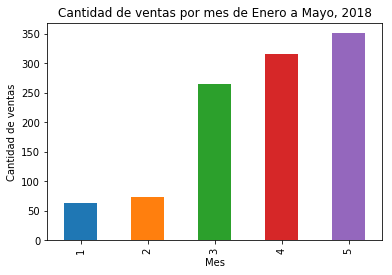

In [105]:
conversion_e = trocafone_events.loc[(trocafone_events['event'] == 'conversion') & (trocafone_events.timestamp.dt.month < 6), :]
monthly_conversions = conversion_e['timestamp'].groupby(conversion_e.timestamp.dt.month).agg('count')
monthly_conversions.plot.bar()
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.title('Cantidad de ventas por mes de Enero a Mayo, 2018')
plt.show()

# Datos sobre el modelo (columna 'model')

In [66]:
# Cuales son los distintos modelos de dispositivos o marcas. Se obtiene la primera palabra de la columna model
# donde claramente contiene la marca

In [65]:
trocafone_events['model'].str.split(n=1).str[0].unique()

array([nan, 'iPhone', 'Samsung', 'Motorola', 'Asus', 'Quantum', 'Lenovo',
       'Sony', 'LG', 'iPad', 'Blackberry'], dtype=object)

In [ ]:
#Cuales son las marcas mas vendidas en todo el set de datos (evento conversion)

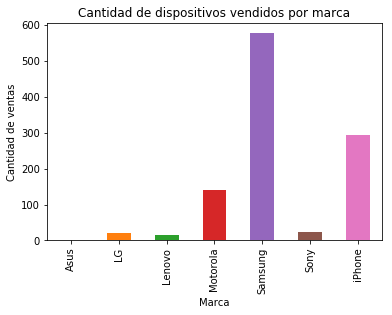

In [104]:
model_conversion = conversion_e['model'].groupby(conversion_e.model.str.split(n=1).str[0]).agg('count')
model_conversion.plot.bar()
plt.xlabel('Marca')
plt.ylabel('Cantidad de ventas')
plt.title('Cantidad de dispositivos vendidos por marca')
plt.show()

In [115]:
# Cual es el modelo mas vendido de todos los modelos disponibles? (Da lo mismo, no se si es necesario)

In [116]:
conversion_e['model'].groupby(conversion_e.model).agg('count').idxmax()

'Samsung Galaxy J5'